<a href="https://colab.research.google.com/github/RizkyPutraKurniawan24/Machine-Learning/blob/master/Supervised%20Learning/Regression/Linear%20Regression%20Explaination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LINEAR REGRESSION**

- Linear regression analysis digunakan untuk memprediksi nilai suatu variabel berdasarkan nilai variabel lain.
>- Variable yang ingin diprediksi disebut **dependent variable**.
>- Variable yang digunakan untuk memprediksi nilai variabel lain disebut **independent variables**.

## **Making Predictions with Linear Regression**

- Mengingat representasinya adalah linear equation, membuat prediksi semudah menyelesaikan persamaan untuk sekumpulan masukan tertentu.

$$Linear Regression : y = b_0 + b_1 X$$

- Mari buat ini menjadi nyata dengan sebuah contoh. Bayangkan mem-predict weight (y) dari height (x).

- Representasi linear regression model untuk masalah ini adalah:

$$weight = b_0 + b_1 height$$

- Dimana $b_0$ adalah bias coefficient dan $b_1$ adalah coefficient dari height column. Kami menggunakan learning technique untuk menemukan set of coefficients yang baik. Setelah ditemukan, kami dapat memasukkan nilai height yang berbeda untuk memprediksi beratnya.

### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### **Dataset**

In [ ]:
pizza = {'Diameter' : [6 , 8, 10, 14, 18],
         'Price' : [7, 9 ,13, 17.5, 18]}

df = pd.DataFrame(pizza)

### **Check Dataset**

In [ ]:
df.head()

,Diameter,Price
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Diameter  5 non-null      int64  
 1   Price     5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 208.0 bytes


In [ ]:
df.shape

(5, 2)

In [ ]:
df.describe()

,Diameter,Price
count,5.000000,5.000000
mean,11.200000,12.900000
std,4.816638,4.929503
min,6.000000,7.000000
25%,8.000000,9.000000
50%,10.000000,13.000000
75%,14.000000,17.500000
max,18.000000,18.000000


### **Visualize Dataset**

<function matplotlib.pyplot.show(close=None, block=None)>

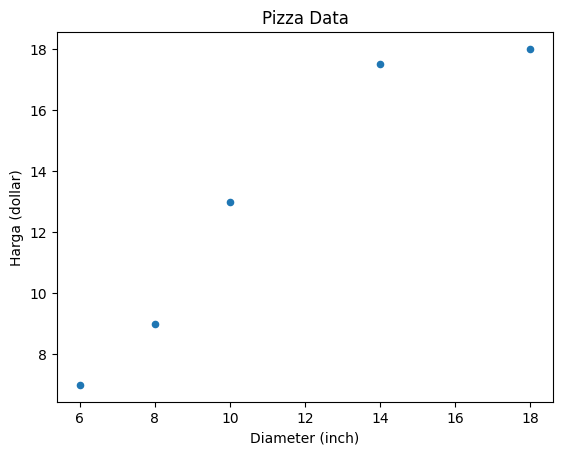

In [ ]:
df.plot(kind='scatter', x='Diameter', y='Price')

plt.title('Pizza Data')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')

plt.show

### **Data Preparation**

- Split the data into independent variable (X) and dependent variable (y).
- Typically, the independent variable (X) is the features used to predict the dependent variable (y).

In [ ]:
X = np.array(pizza['Diameter']).reshape(-1, 1)  # Reshape to column vector
y = np.array(pizza['Price'])

### **Splitting the Data into Training and Testing Sets**

- Split the data into training and testing sets. The training data is used to train the model, while the testing data is used to evaluate the model's performance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Creating the Model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **Make Predictions**

- Use the trained model to make predictions on the testing data.

In [ ]:
#Make Predictions
y_pred = model.predict(X_test)

### **Model Evaluation**

- Evaluate the model's performance using the testing data.
- Common evaluation metrics for regression include R-squared, Mean Squared Error (MSE), and others.

In [ ]:
# Model Evaluation
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error :' ,{mse})
print(f'Root Mean Squared Error :' ,{rmse})
print(f'Mean Absolute Error :' ,{mae})
print(f'Mean Absolute Percentage Error :' ,{mape})

Mean Squared Error : {1.265625}
Root Mean Squared Error : {1.125}
Mean Absolute Error : {1.125}
Mean Absolute Percentage Error : {12.5}


### **Visualizing the Results**

- Visualize the training and testing data with linear regression line.

<function matplotlib.pyplot.show(close=None, block=None)>

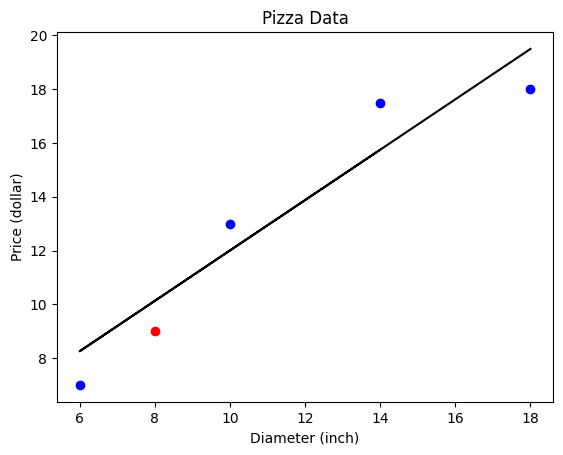

In [ ]:
# Plotting training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plotting testing data
plt.scatter(X_test, y_test, color='red', label='Testing Data')

# Plotting Linear Regressi Line
plt.plot(X_train, model.predict(X_train), color='black', label='Linear Regression')

plt.title('Pizza Data')
plt.xlabel('Diameter (inch)')
plt.ylabel('Price (dollar)')

plt.show

#### **Linear Regression Equation**

**Formula Linear Regression** : $y = b_0 + b_1 X$

$Y$ : dependent varible

$X$ : independent variable

$b_0$ : y-intercept

$b_1$ : slope

In [ ]:
# Slope (Coefficient)
slope = model.coef_[0]
# Intercept
intercept = model.intercept_

# Printing the linear regression equation
print("Linear regression equation:")
print(f"Price = {intercept:.2f} + {slope:.2f} * X")

Linear regression equation:
Price = 2.63 + 0.94 * X


### **Input New Values**

In [ ]:
# New data
new_diameter = [9, 12, 15]

# Reshape the new data
new_diameter_array = np.array(new_diameter).reshape(-1, 1)

# Making predictions
predicted_prices = model.predict(new_diameter_array)

# Printing the predicted prices
for i, diameter in enumerate(new_diameter):
    print(f"For a diameter of {diameter}, the predicted price is: ${predicted_prices[i]:.2f}")

For a diameter of 9, the predicted price is: $11.06
For a diameter of 12, the predicted price is: $13.88
For a diameter of 15, the predicted price is: $16.69
